# Neural Network

## Importing the libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset
### Penguins Dataset Overview

This dataset contains information about **penguin species**, specifically from the Palmer Station, Antarctica. It provides data on various physical measurements of the penguins, including their **bill length** and **flipper length**. The dataset includes the following columns:

- **species**: The species of the penguin (e.g., Adelie, Gentoo, Chinstrap).
- **bill_length_mm**: The length of the penguin's bill in millimeters.
- **flipper_length_mm**: The length of the penguin's flipper in millimeters.

In [48]:
dataset = pd.read_csv('penguins.csv')
dataset.sample(10)

,species,bill_length_mm,flipper_length_mm
334,Chinstrap,50.2,202.0
59,Adelie,37.6,194.0
218,Gentoo,46.2,214.0
14,Adelie,34.6,198.0
84,Adelie,37.3,191.0
62,Adelie,37.6,185.0
28,Adelie,37.9,172.0
142,Adelie,32.1,188.0
67,Adelie,41.1,188.0
279,Chinstrap,45.4,188.0


## Extracting Features and Labels

This code separates the dataset into **features (X)** and **labels (y)**:
1. **Features (`X`)**: It selects all columns except the first one (using `iloc[:, 1:]`) as the features (input variables).
2. **Labels (`y`)**: It selects the first column (using `iloc[:, 0]`) as the labels (target variable).

In [49]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

## Handling Missing and Infinite Values in Data

This code identifies and handles **NaN** (Not a Number) and **infinite** values in the feature matrix `X`:
1. **Identifies NaN and Infinite Values**: It finds the indices of NaN and infinite values in the dataset using `np.isnan` and `np.isinf`.
2. **Replaces NaNs**: It calculates the column-wise means (ignoring NaNs) and replaces any NaN values with the corresponding column means.
3. **Verification**: It checks that no NaN or infinite values remain in the dataset using `np.isfinite` and raises an assertion error if any are found.

In [50]:
nan_indices = np.where(np.isnan(X))
inf_indices = np.where(np.isinf(X))

print("NaN values at indices:", nan_indices)
print("Infinite values at indices:", inf_indices)

NaN values at indices: (array([  3,   3, 271, 271]), array([0, 1, 0, 1]))
Infinite values at indices: (array([], dtype=int64), array([], dtype=int64))


In [51]:
# Calculates column-wise means ignoring NaNs
col_means = np.nanmean(X, axis=0)

# Replaces NaNs with column means
for i in range(X.shape[1]):
    X[np.isnan(X[:, i]), i] = col_means[i]

In [52]:
# Verifies if there are any NaN or infinite values left
assert np.isfinite(X).all(), "X contains NaN or infinite values!"

In [53]:
y[:10]

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

## Encoding and One-Hot Encoding of Labels

This code performs the following:
1. **Label Encoding**: Converts the species labels into numerical values using `np.unique` with `return_inverse=True`, which maps each species to a unique integer.
2. **One-Hot Encoding**: Converts the numerical labels (`y_encoded`) into one-hot encoded vectors using `np.eye`, where each species is represented as a binary vector.

In [54]:
labels, y_encoded = np.unique(y, return_inverse=True)
labels, y_encoded[:10]

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [55]:
y_one_hot = np.eye(len(labels))[y_encoded]
y_one_hot.shape, y_one_hot[10:]

((344, 3),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]]))

## Plotting Scatter Plot of Features

This code generates a scatter plot to visualize the relationship between **bill length** and **flipper length** for each species.<br> 
Different markers are used for each species to distinguish them. The x-axis represents **bill length (mm)**, <br>
and the y-axis represents **flipper length (mm)**. A legend is included to label the species.


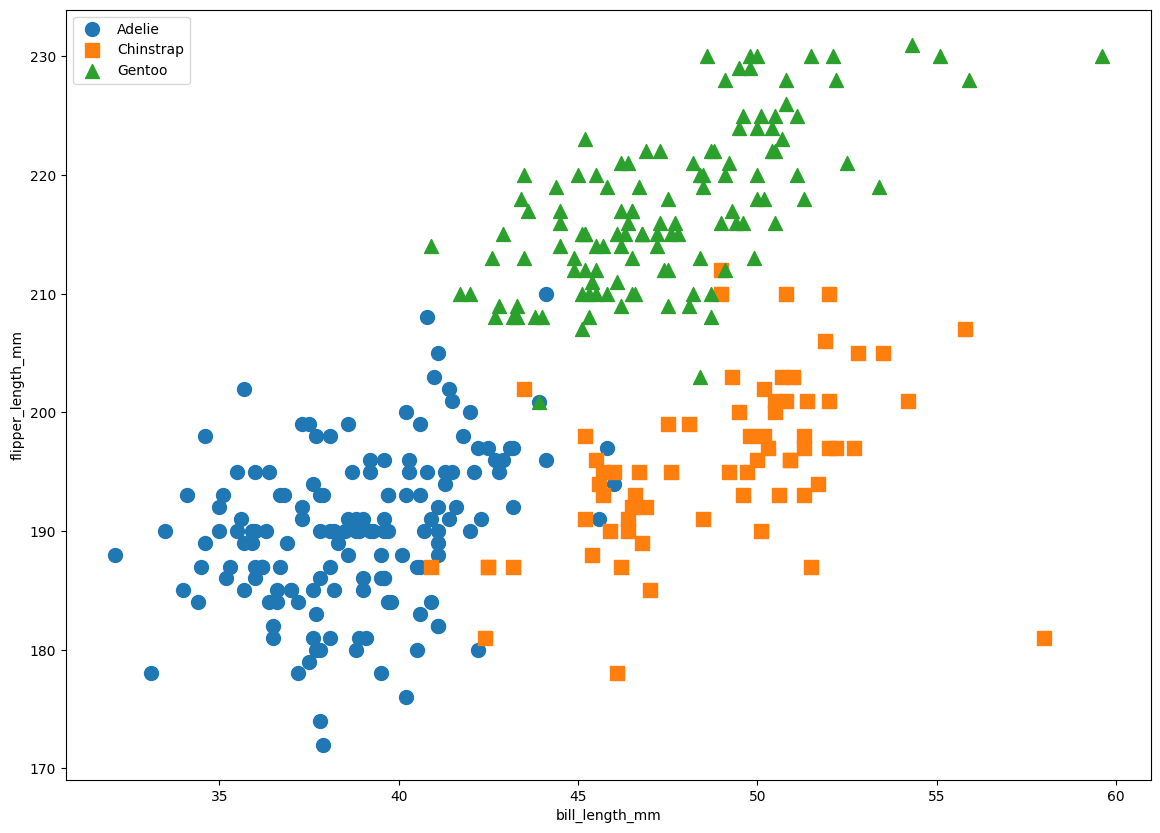

In [56]:
markers = ['o', 's', '^'] 
plt.figure(figsize=(14, 10))

for label, marker in zip(np.unique(y_encoded), markers):
    plt.scatter(X[y_encoded == label, 0], X[y_encoded == label, 1], label=labels[label], marker=marker, s=100)
plt.xlabel("bill_length_mm")
plt.ylabel("flipper_length_mm")
plt.legend()
plt.show()


## Plotting Class Distribution

This code creates a bar chart to visualize the distribution of species in the dataset. <br>
The bar chart uses different colors for each species and shows the frequency of each species (encoded labels) in the dataset.<br> 
The x-axis represents the species, and the y-axis shows the frequency (count) of each species.

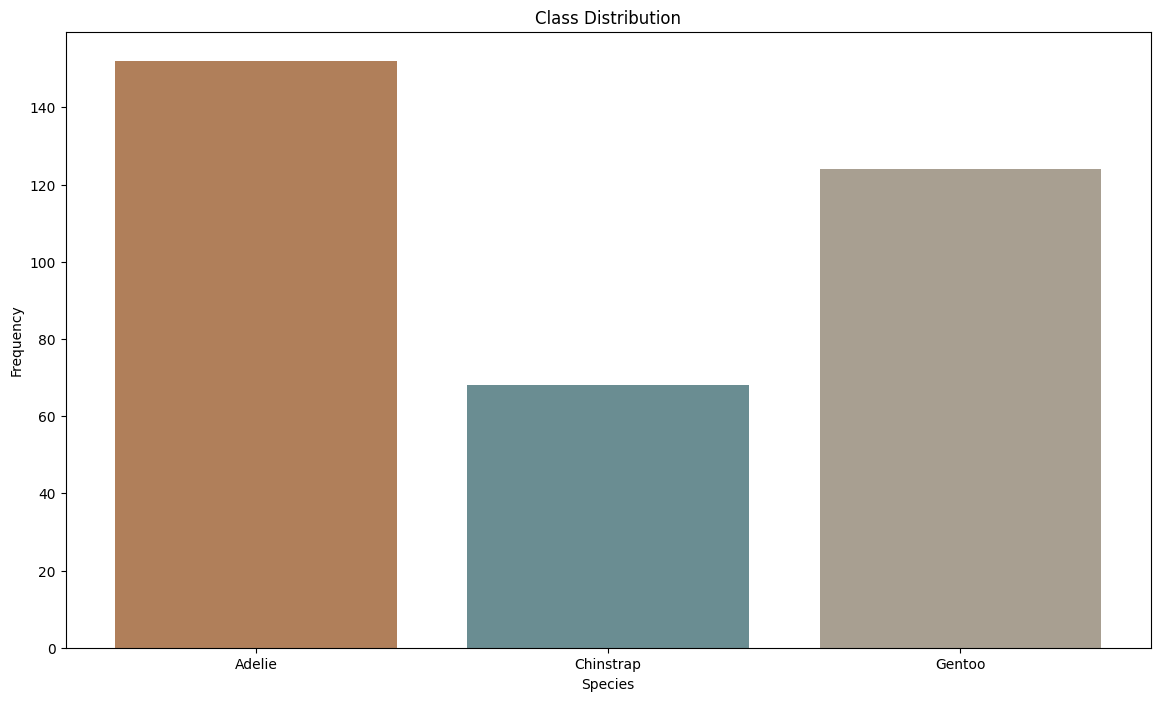

In [57]:
colors = ['#B07F5A', '#6A8D92', '#A89F91']

plt.figure(figsize=(14, 8))
plt.bar(labels, np.bincount(y_encoded), color=colors)  
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()


## Plotting Histograms of Features by Species

This code plots histograms to show the distribution of **bill length** and **flipper length** for each penguin species.<br>
It overlays the histograms for both features, allowing a comparison of their distributions across different species.<br>
The plot includes labels, a legend, and a title for clarity.

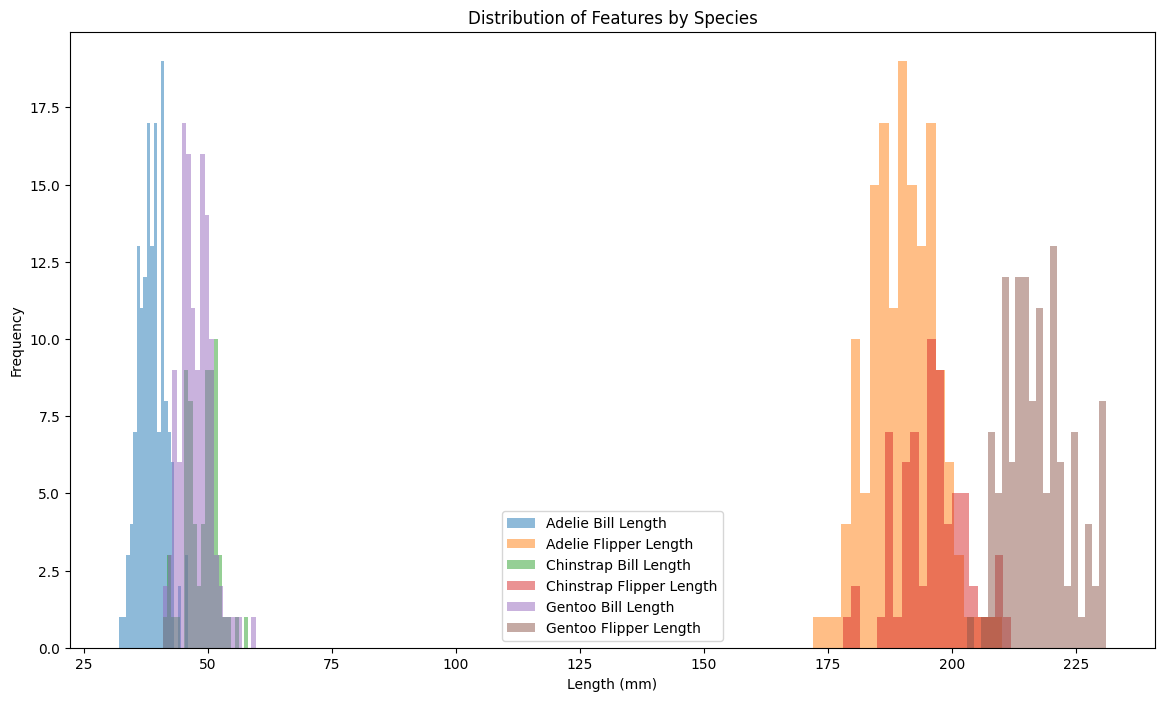

In [58]:
plt.figure(figsize=(14, 8))

for label in np.unique(y):
    subset = dataset[dataset['species'] == label]
    plt.hist(subset['bill_length_mm'], alpha=0.5, label=f'{label} Bill Length', bins=20)
    plt.hist(subset['flipper_length_mm'], alpha=0.5, label=f'{label} Flipper Length', bins=20)

plt.xlabel('Length (mm)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Features by Species')
plt.show()

## Shuffling and Splitting the Data

This section of the code shuffles the dataset and splits it into training and test sets based on a defined ratio (80% for training and 20% for testing).<br>
This is a common step in machine learning workflows to ensure that the model is trained and evaluated on different data subsets,<br> 
helping prevent overfitting and ensuring generalizability.

#### **Process**:
1. **Shuffle the data**:  
   Randomly permutes the indices of the dataset to ensure that the training and test sets are not ordered or biased.
   
2. **Define the split ratio**:  
   The dataset is split into training and test sets. The **train_size** is determined based on the defined ratio (80% train, 20% test).

3. **Split the indices**:  
   The indices are divided into two sets:
   - **Training set indices**: The first portion of the shuffled indices.
   - **Test set indices**: The remaining portion of the shuffled indices.

4. **Create the training and test sets**:  
   The features (`X`) and labels (`y_one_hot`) are split using the generated indices to create `X_train`, `X_test`, `y_train`, and `y_test`.

#### **Output**:
- **`X_train`, `y_train`**: The feature and label sets used for training the model.
- **`X_test`, `y_test`**: The feature and label sets used for evaluating the model.


In [59]:
# Shuffles the data by generating random indices
indices = np.random.permutation(len(X))

# Defines the split ratio (80% train, 20% test)
split_ratio = 0.8
train_size = int(len(X) * split_ratio)

# Splits the indices into training and test sets
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y_one_hot[train_indices]
y_test = y_one_hot[test_indices]

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (275, 2)
X_test shape: (69, 2)
y_train shape: (275, 3)
y_test shape: (69, 3)


## Function for normalizing the input features
This function normalizes the input features using **Z-score standardization** (or **standardization**). It scales the data so that each feature has a mean of 0 and a standard deviation of 1. This is crucial for many machine learning models, ensuring that all features contribute equally to the learning process.

#### **Process**:
1. Calculate the mean of each feature in the dataset.
2. Calculate the standard deviation of each feature.
3. Normalize each feature using the formula:  
   $ x_i^{\text{normalized}} = \frac{x_i - \mu_i}{\sigma_i} $  
   Where:
   - $ \mu_i $ is the mean of the feature $i$.
   - $ \sigma_i $ is the standard deviation of the feature $i$.

#### **Why Normalize?**
- **Improves performance**: Many algorithms (like k-NN, SVM, and neural networks) perform better with normalized data.
- **Equal feature contribution**: Ensures features with larger scales don’t dominate the model.
- **Required for some models**: Distance-based models and gradient descent algorithms perform better on standardized data.



In [60]:
def normalize_features(X):
    #Normalizes features using Z-score standardization.
    feature_means = np.mean(X, axis=0)
    feature_stds = np.std(X, axis=0)

    X_normalized = (X - feature_means) / feature_stds
    
    return X_normalized

## Normalizing Input Features

This code normalizes the **training** and **test** feature sets:
1. **Normalization**: The `normalize_features` function is applied to both `X_train` and `X_test` to scale the features.

In [61]:
# Normalize the input features
X_train_normalized = normalize_features(X_train)
X_test_normalized = normalize_features(X_test)

print(X_train_normalized[:10])
print()
print(X_test_normalized[:10])

[[-0.53640793 -0.86224187]
 [ 0.9647641   1.42678276]
 [-1.25919446 -1.21990197]
 [ 0.48290641  0.63993054]
 [-1.31479342 -0.86224187]
 [ 0.6497033   0.78299458]
 [ 0.33464251 -0.28998571]
 [ 1.31689087  1.71291084]
 [-0.94413366 -0.79070985]
 [-0.36961103  0.63993054]]

[[ 0.74634601  1.04048541]
 [-1.4210428  -1.09199459]
 [ 0.88964444  2.10672542]
 [ 0.33436301  1.39589875]
 [ 0.2806261  -0.16791992]
 [ 0.33436301 -0.31008526]
 [-1.08070902 -1.09199459]
 [-0.95532289 -0.80766392]
 [-0.45377837 -0.59441592]
 [-0.50751529 -0.38116792]]


## Class: `NeuralNetwork`

This class defines a simple **feedforward neural network** with 3 hidden layers and an output layer. The network uses **ReLU** activation for the hidden layers and **Softmax** for the output layer. It includes methods for **forward propagation** and **backpropagation** to train the model.

#### **Constructor: `__init__(self)`**
- Defines the number of neurons in each layer (input layer, 3 hidden layers, and output layer).
- Initializes weights and biases for each layer using random values.
- Sets the **learning rate** for updating weights during training.

#### **Methods**:

##### **`relu(self, x, der=False)`**
- Implements the **ReLU** activation function. 
  - If `der=True`, it returns the derivative of ReLU (used in backpropagation).
  - Otherwise, it returns the ReLU activation.

##### **`softmax(self, x)`**
- Implements the **Softmax** activation function for the output layer, converting raw output scores into probabilities.

##### **`feedForward(self, X)`**
- Performs **forward propagation** through the network:
  - Input data is passed through each layer.
  - The output is computed after applying ReLU activations and Softmax for the output layer.

##### **`backPropagation(self, X, Y, pred)`**
- Performs **backpropagation** to update the weights and biases:
  - Computes the error and delta for each layer starting from the output layer.
  - Uses the chain rule to propagate the error backward and update the parameters.

##### **`train(self, X, Y)`**
- Combines **forward pass** and **backward pass** for training:
  - First computes the predictions using `feedForward`.
  - Then updates the weights and biases using `backPropagation`.

In [62]:
class NeuralNetwork:
    def __init__(self):
        # Defines the number of neurons in each layer
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 5
        hiddenLayer2Neurons = 5
        hiddenLayer3Neurons = 5
        outputLayerNeurons = 3

        # Learning rate
        self.learning_rate = 0.0001

        # Weights for the layers
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_O = np.random.randn(hiddenLayer3Neurons, outputLayerNeurons)

        # Biases for the layers
        self.b_H1 = np.random.randn(1, hiddenLayer1Neurons)
        self.b_H2 = np.random.randn(1, hiddenLayer2Neurons)
        self.b_H3 = np.random.randn(1, hiddenLayer3Neurons)
        self.b_O = np.random.randn(1, outputLayerNeurons)

    def relu(self, x, der=False):
        if der:
            return np.where(x > 0, 1, 0)
        else:
            return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        # Layer 1
        self.hidden_input1 = np.dot(X, self.W_H1) + self.b_H1
        self.hidden_output1 = self.relu(self.hidden_input1)

        # Layer 2
        self.hidden_input2 = np.dot(self.hidden_output1, self.W_H2) + self.b_H2
        self.hidden_output2 = self.relu(self.hidden_input2)

        # Layer 3
        self.hidden_input3 = np.dot(self.hidden_output2, self.W_H3) + self.b_H3
        self.hidden_output3 = self.relu(self.hidden_input3)

        # Output layer
        self.output_input = np.dot(self.hidden_output3, self.W_O) + self.b_O
        pred = self.softmax(self.output_input)
        
        return pred

    def backPropagation(self, X, Y, pred):
        # Output layer error and delta
        output_error = Y - pred
        output_delta = output_error

        # Hidden layer 3 error and delta
        hidden_error3 = output_delta.dot(self.W_O.T)
        hidden_delta3 = hidden_error3 * self.relu(self.hidden_input3, der=True)

        # Hidden layer 2 error and delta
        hidden_error2 = hidden_delta3.dot(self.W_H3.T)
        hidden_delta2 = hidden_error2 * self.relu(self.hidden_input2, der=True)

        # Hidden layer 1 error and delta
        hidden_error1 = hidden_delta2.dot(self.W_H2.T)
        hidden_delta1 = hidden_error1 * self.relu(self.hidden_input1, der=True)

        # Updates weights and biases
        self.W_O += self.learning_rate * self.hidden_output3.T.dot(output_delta)
        self.b_O += self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)

        self.W_H3 += self.learning_rate * self.hidden_output2.T.dot(hidden_delta3)
        self.b_H3 += self.learning_rate * np.sum(hidden_delta3, axis=0, keepdims=True)

        self.W_H2 += self.learning_rate * self.hidden_output1.T.dot(hidden_delta2)
        self.b_H2 += self.learning_rate * np.sum(hidden_delta2, axis=0, keepdims=True)

        self.W_H1 += self.learning_rate * X.T.dot(hidden_delta1)
        self.b_H1 += self.learning_rate * np.sum(hidden_delta1, axis=0, keepdims=True)

    def train(self, X, Y):
        # Forward pass
        output = self.feedForward(X)

        # Backward pass
        self.backPropagation(X, Y, output)

## Functions: `categorical_cross_entropy` and `accuracy`

#### **`categorical_cross_entropy(y_true, y_pred)`**
This function calculates the **categorical cross-entropy loss** between the true labels (`y_true`) and the predicted labels (`y_pred`):
- It clips the predicted values (`y_pred`) to avoid taking the logarithm of 0.
- Then, it computes the cross-entropy loss, which measures how well the predicted probabilities match the actual labels.
- The loss is averaged across the batch size.

#### **`accuracy(y_true, y_pred)`**
This function calculates the **accuracy** of the model's predictions:
- It compares the index of the highest predicted probability (`y_pred`) with the true class (`y_true`), determining whether the predictions are correct.
- The accuracy is the proportion of correct predictions in the dataset.

In [63]:
def categorical_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-9, 1 - 1e-9)  # Prevent log(0)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

In [64]:
def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

## Training the Neural Network

This code trains the neural network (`NN`) for **10000 epochs**:
1. **Training Loop**: For each epoch:
   - The `train` method of the `NeuralNetwork` class is called to perform one step of forward and backward propagation.
   - Predictions (`y_pred`) are made on the normalized training data using the `feedForward` method.
   - **Loss**: The categorical cross-entropy loss is calculated using the `categorical_cross_entropy` function and appended to the `err` list.
   - **Accuracy**: The accuracy is calculated using the `accuracy` function and appended to the `acc` list.

In [65]:
# Training
NN = NeuralNetwork()
epochs = 10000
err = []
acc = []

for epoch in range(epochs):
    NN.train(X_train_normalized, y_train)
    y_pred = NN.feedForward(X_train_normalized)
    err.append(categorical_cross_entropy(y_train, y_pred))
    acc.append(accuracy(y_train, y_pred))
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {err[epoch]:.4f}, Accuracy: {acc[epoch]:.4f}")

Epoch 0/10000 - Loss: 1.8872, Accuracy: 0.3964
Epoch 100/10000 - Loss: 0.3147, Accuracy: 0.9055
Epoch 200/10000 - Loss: 0.2364, Accuracy: 0.9309
Epoch 300/10000 - Loss: 0.2089, Accuracy: 0.9418
Epoch 400/10000 - Loss: 0.1936, Accuracy: 0.9382
Epoch 500/10000 - Loss: 0.1835, Accuracy: 0.9382
Epoch 600/10000 - Loss: 0.1762, Accuracy: 0.9382
Epoch 700/10000 - Loss: 0.1703, Accuracy: 0.9382
Epoch 800/10000 - Loss: 0.1657, Accuracy: 0.9382
Epoch 900/10000 - Loss: 0.1620, Accuracy: 0.9382
Epoch 1000/10000 - Loss: 0.1590, Accuracy: 0.9382
Epoch 1100/10000 - Loss: 0.1564, Accuracy: 0.9418
Epoch 1200/10000 - Loss: 0.1544, Accuracy: 0.9418
Epoch 1300/10000 - Loss: 0.1525, Accuracy: 0.9455
Epoch 1400/10000 - Loss: 0.1508, Accuracy: 0.9455
Epoch 1500/10000 - Loss: 0.1474, Accuracy: 0.9527
Epoch 1600/10000 - Loss: 0.1438, Accuracy: 0.9527
Epoch 1700/10000 - Loss: 0.1410, Accuracy: 0.9527
Epoch 1800/10000 - Loss: 0.1375, Accuracy: 0.9564
Epoch 1900/10000 - Loss: 0.1342, Accuracy: 0.9564
Epoch 2000/1

## Plotting Training Loss and Accuracy

This code generates two side-by-side plots:
1. **Training Loss**: Shows the categorical cross-entropy loss over epochs.
2. **Training Accuracy**: Displays the accuracy over epochs.

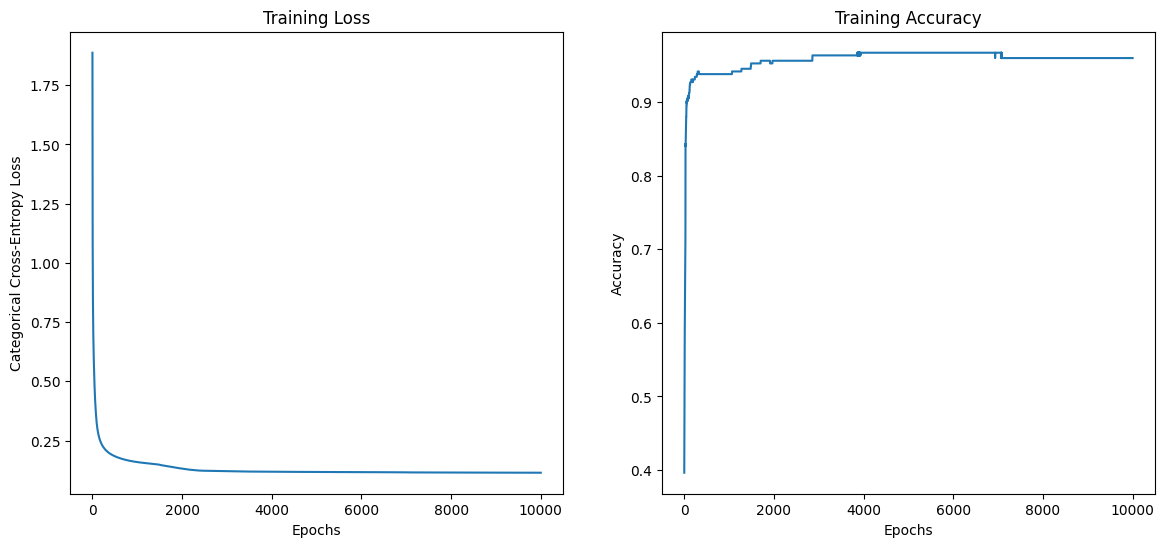

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  

# Plot the error 
ax[0].plot(err)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Categorical Cross-Entropy Loss')
ax[0].set_title('Training Loss')

# Plot the accuracy
ax[1].plot(acc)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Training Accuracy')

plt.show()


## Evaluating the Model on the Test Set

This code evaluates the trained neural network on the **test set**:
1. **Test Predictions**: The model makes predictions on the normalized test data.
2. **Test Loss**: The **categorical cross-entropy loss** is calculated for the test set predictions.
3. **Test Accuracy**: The **accuracy** of the model on the test set is computed.

In [67]:
y_test_pred = NN.feedForward(X_test_normalized)

test_loss = categorical_cross_entropy(y_test, y_test_pred)
test_accuracy = accuracy(y_test, y_test_pred)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")


Test Loss: 0.1352
Test Accuracy: 95.65%


## Plotting Confusion Matrix

This code generates and visualizes the **confusion matrix** for the model's predictions on the test set:
1. **Predictions**: The predicted labels (`y_test_pred_labels`) and true labels (`y_test_labels`) are obtained by taking the `argmax` of the model's output and the true one-hot encoded labels, respectively.
2. **Confusion Matrix**: The confusion matrix is computed using `confusion_matrix` to compare the predicted and actual labels.
3. **Visualization**: The confusion matrix is displayed using `ConfusionMatrixDisplay` with a **Blues** color map, and the axis labels are rotated for clarity.

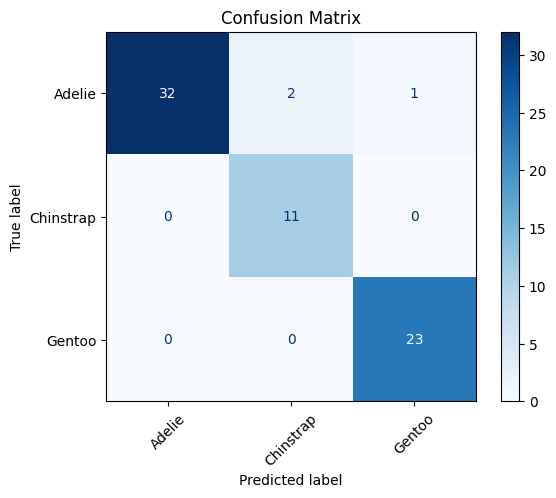

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test_labels, y_test_pred_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

## Plotting Decision Boundaries

This code visualizes the **decision boundaries** of the trained neural network:
1. **Mesh Grid**: A mesh grid is created covering the feature space (bill length and flipper length) of the test set.
2. **Grid Predictions**: The model makes predictions on each point in the grid, determining the predicted class for each region.
3. **Decision Boundaries**: The decision boundaries are plotted using `contourf`, with different colors representing different predicted classes.
4. **Test Data Points**: The true test data points are overlaid on the decision boundary plot, with different markers for each species.

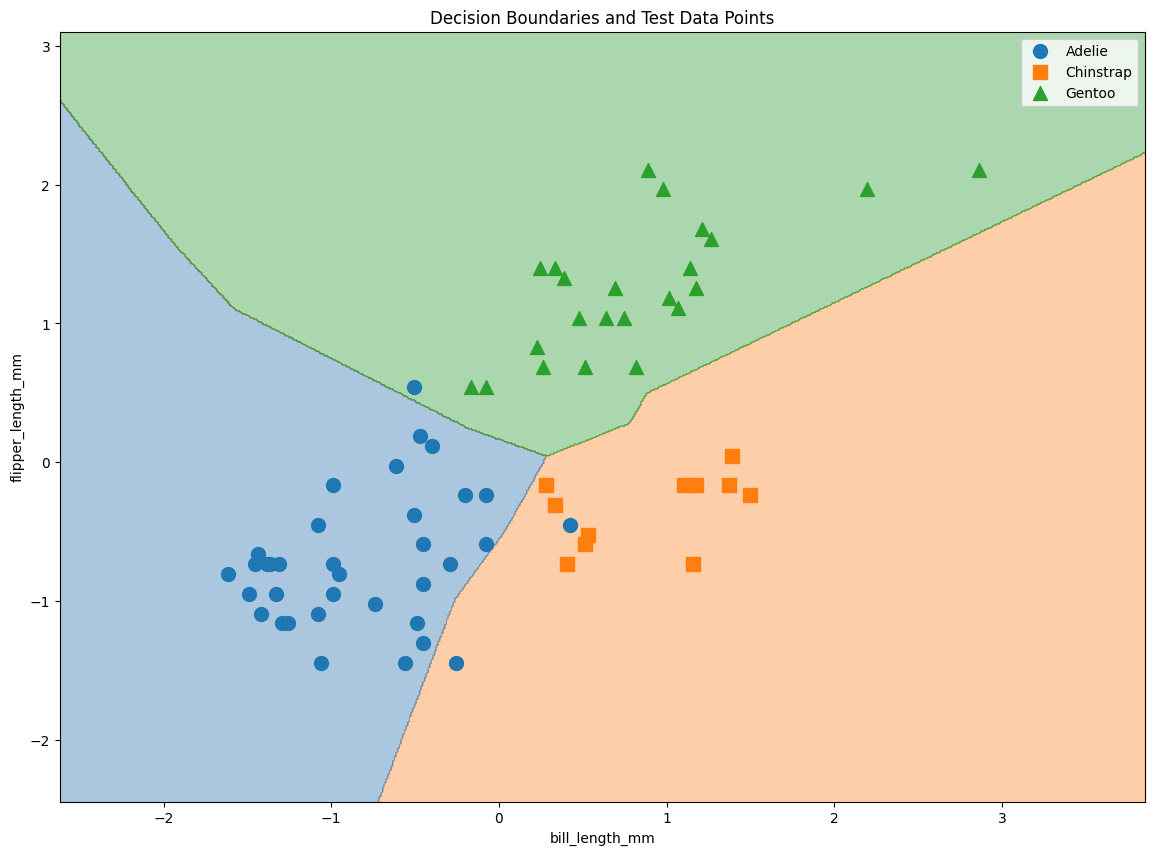

In [69]:
from matplotlib.colors import ListedColormap

# Define a mesh grid
x_min, x_max = X_test_normalized[:, 0].min() - 1, X_test_normalized[:, 0].max() + 1
y_min, y_max = X_test_normalized[:, 1].min() - 1, X_test_normalized[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict over the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_pred = NN.feedForward(grid_points)
grid_pred_classes = np.argmax(grid_pred, axis=1)

# Plot the decision boundary
plt.figure(figsize=(14, 10))
cmap = ListedColormap(['#2b75b1', '#fd8529', '#2f9d35'])
plt.contourf(xx, yy, grid_pred_classes.reshape(xx.shape), alpha=0.4, cmap=cmap)

for label, marker in zip(np.unique(y_test_labels), markers):
    plt.scatter(X_test_normalized[y_test_labels == label, 0], 
                X_test_normalized[y_test_labels == label, 1], 
                label=labels[label], 
                marker=marker, 
                s=100)

plt.xlabel("bill_length_mm")
plt.ylabel("flipper_length_mm")
plt.legend()
plt.title("Decision Boundaries and Test Data Points")
plt.show()
